<a href="https://colab.research.google.com/github/marcos-code/Mod-4-Introdu-o-ML/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primerias entradas 
print("Tamanho de df: {}\n".format(df.shape))

df.head()


Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# importar scikit-learn para criar modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Nesta estapa, vamos dividir o dataset entre treino e teste, da mesma maneira que fizemos e sempre vamos fazer para outros modelos.


In [6]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

#3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test) # padronizar os dados de teste
y_pred = model.predict(X_test)

Antes de olhar as métricas de avaliação do modelo, vamos relembrar os conceitos:

* **Verdadeiro positivo** (true positive — TP): Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como tendo doença vascular.

* **Falso positivo** (false positive — FP): Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como tendo doença vascular.

* **Falso verdadeiro** (true negative — TN): Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

* **Verdadeiro negativo** (false negative — FN): Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

In [7]:
# imprimir relatório de clasificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84        45
           1       0.74      0.90      0.81        31

    accuracy                           0.83        76
   macro avg       0.83      0.84      0.83        76
weighted avg       0.85      0.83      0.83        76



Por fim vamos plotar a matriz de confusão para ter prioritamente uma visão do desempenho por classes.


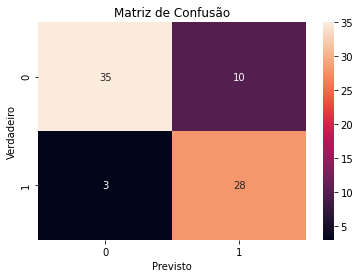

In [10]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Caso queira ver a probabilidades associadas a cada previsão, pode utilizar o método `predict_proba` da seguinte maneira.

In [11]:
y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_proba: \n", y_prob[0:5])


y_pred: 
 [0 1 0 0 1]

y_proba: 
 [[0.73671136 0.26328864]
 [0.464807   0.535193  ]
 [0.60968927 0.39031073]
 [0.90519214 0.09480786]
 [0.00182509 0.99817491]]
